In [1]:
import os
import pandas as pd
import matplotlib.pyplot as plt

# ResNet

In [2]:
# Config
csv_files = {
    "resnet_adam_lr2_dropout15": "results/history_resnet_adam_lr2_dropout15_bn.csv",
    "resnet_adam_lr3_dropout0": "results/history_resnet_adam_lr3_dropout0_bn.csv",
    "resnet_adam_lr3_dropout15": "results/history_resnet_adam_lr3_dropout15_bn.csv",
    "resnet_adam_lr3_dropout20": "results/history_resnet_adam_lr3_dropout20_bn.csv",
    "resnet_sgd_mom09_lr3_dropout15": "results/history_resnet_sgd_mom09_lr3_dropout15_bn.csv"
}

In [3]:
baseline_f1 = 0.0011
emotion_labels = ['angry', 'disgust', 'fear', 'happy', 'neutral', 'sad', 'surprise']
model_histories = {name: pd.read_csv(path) for name, path in csv_files.items()}

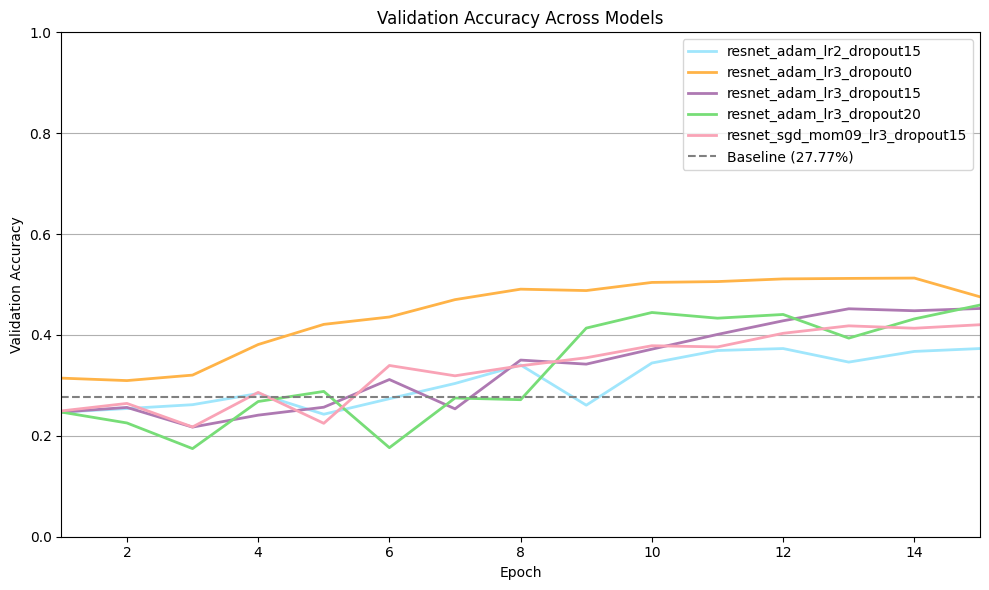

In [4]:
pastel_colors = ["#a0e6fc", '#FFB347', "#AE79B2", '#77DD77', "#F9A3B6"]  # adjust length if needed

plt.figure(figsize=(10, 6))

for color, (name, df) in zip(pastel_colors, model_histories.items()):
    plt.plot(df['epoch'], df['val_acc'], label=name, color=color, linewidth=2)

plt.axhline(y=0.2777, color='gray', linestyle='--', label='Baseline (27.77%)')
plt.title("Validation Accuracy Across Models")
plt.xlabel("Epoch")
plt.ylabel("Validation Accuracy")
plt.ylim(0, 1)
plt.xlim(1, 15)
plt.grid(True, axis='y')
plt.legend()
plt.tight_layout()
plt.savefig("results/resnet_val_accuracy_comparison.png")
plt.show()

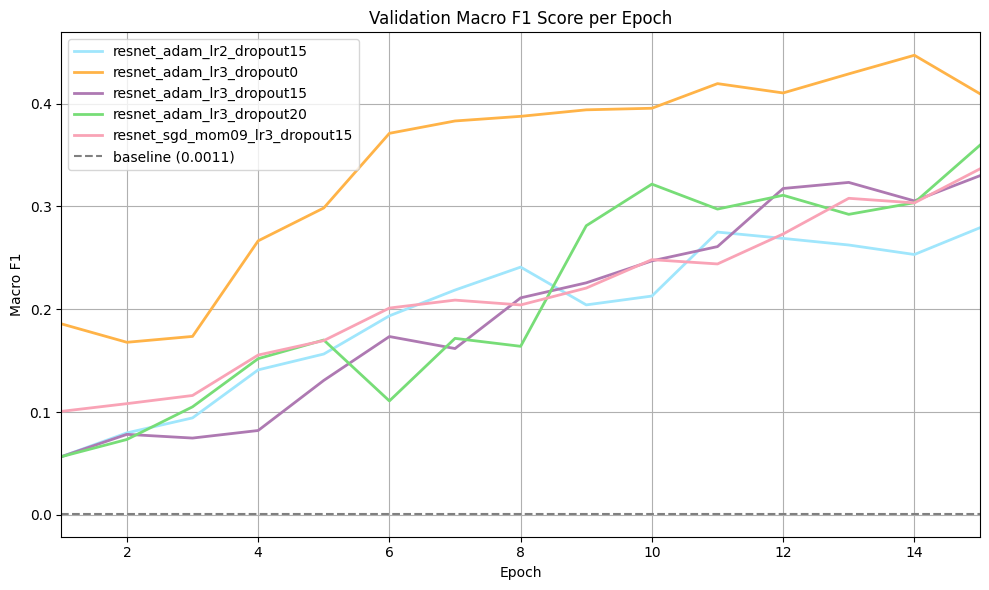

In [5]:
pastel_colors = ["#a0e6fc", '#FFB347', "#AE79B2", '#77DD77', "#F9A3B6"]  # adjust length if needed

# Plot macro F1 over epochs with baseline
plt.figure(figsize=(10, 6))
for color, (name, df) in zip(pastel_colors, model_histories.items()):
    plt.plot(df["epoch"], df["val_f1_macro"], label=name, color=color, linewidth=2)

plt.axhline(y=baseline_f1, color='gray', linestyle='--', label='baseline (0.0011)')
plt.title("Validation Macro F1 Score per Epoch")
plt.xlabel("Epoch")
plt.ylabel("Macro F1")
plt.legend()
plt.xlim(1, 15)
plt.grid(True)
plt.tight_layout()
plt.savefig("results/resnet_macro_f1_comparison.png")
plt.show()

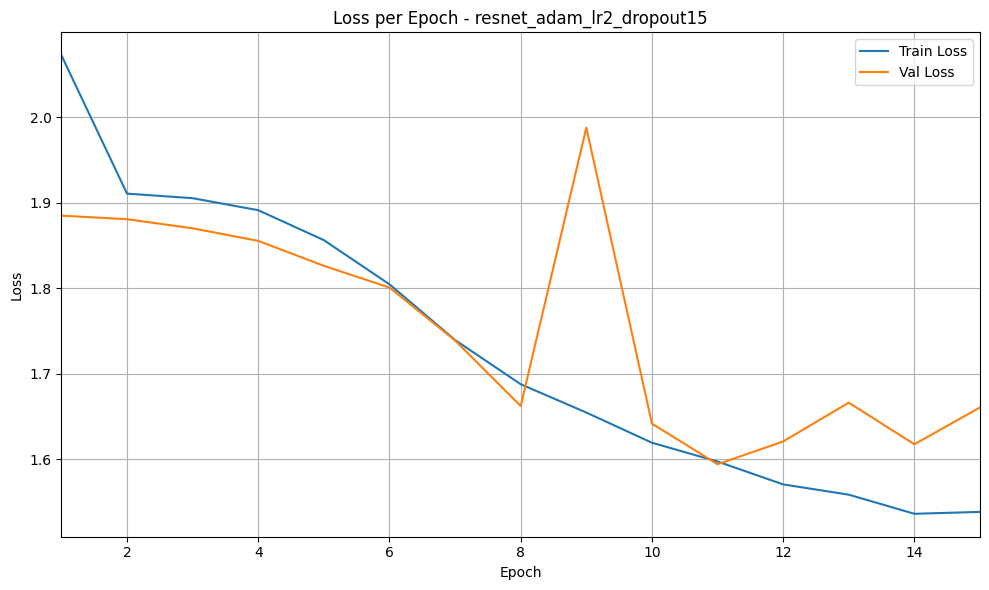

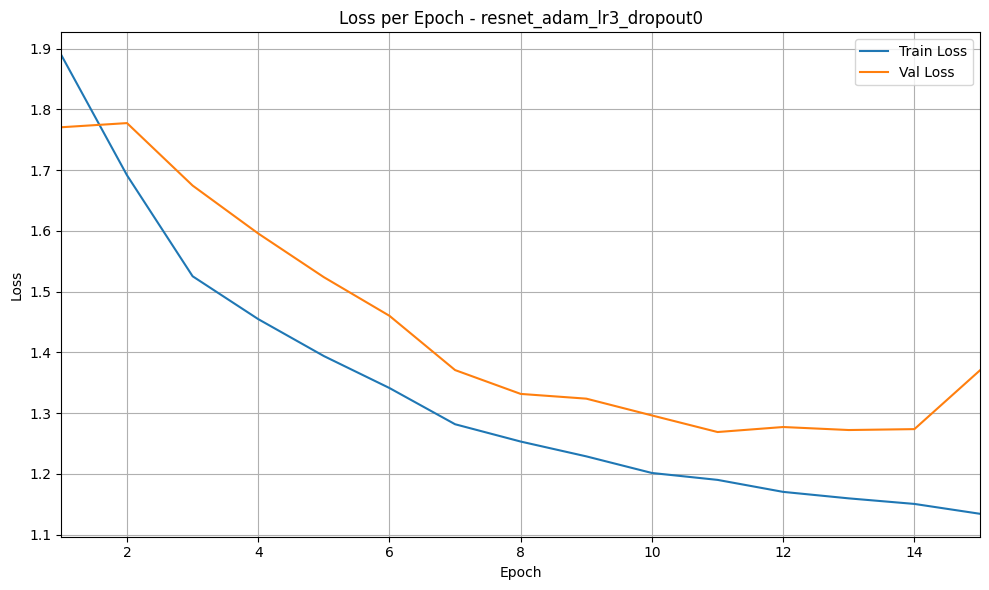

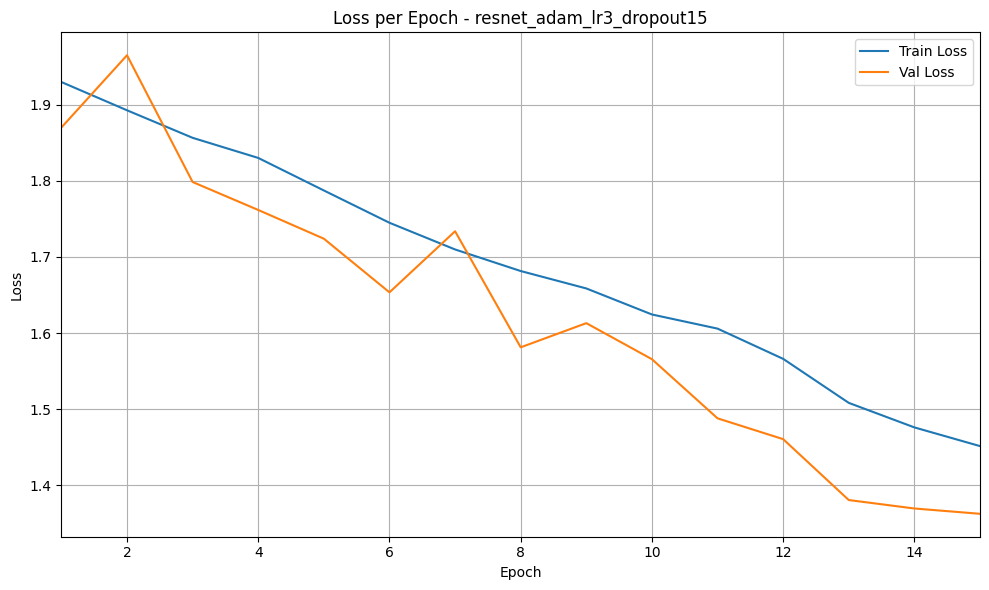

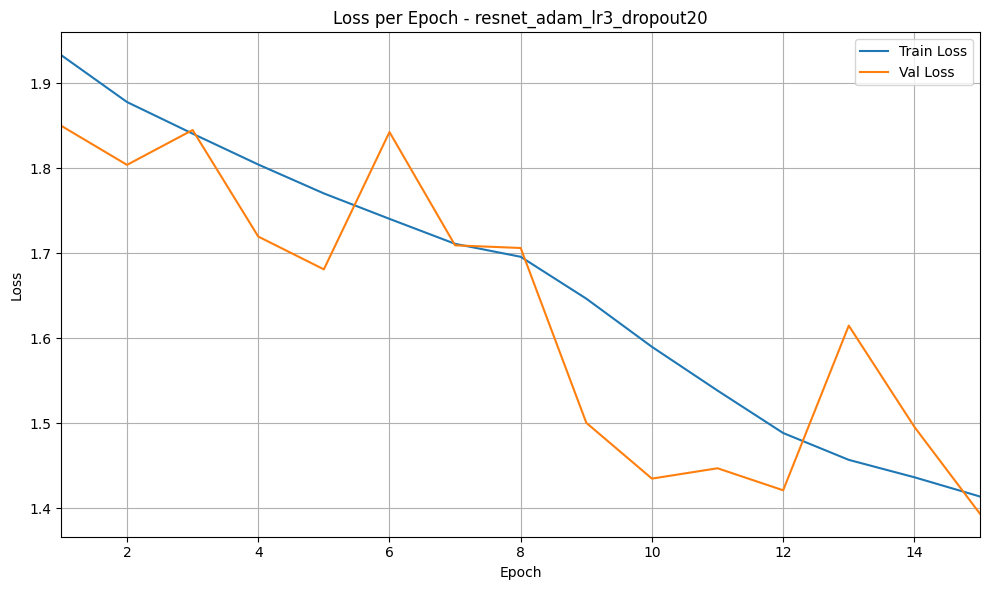

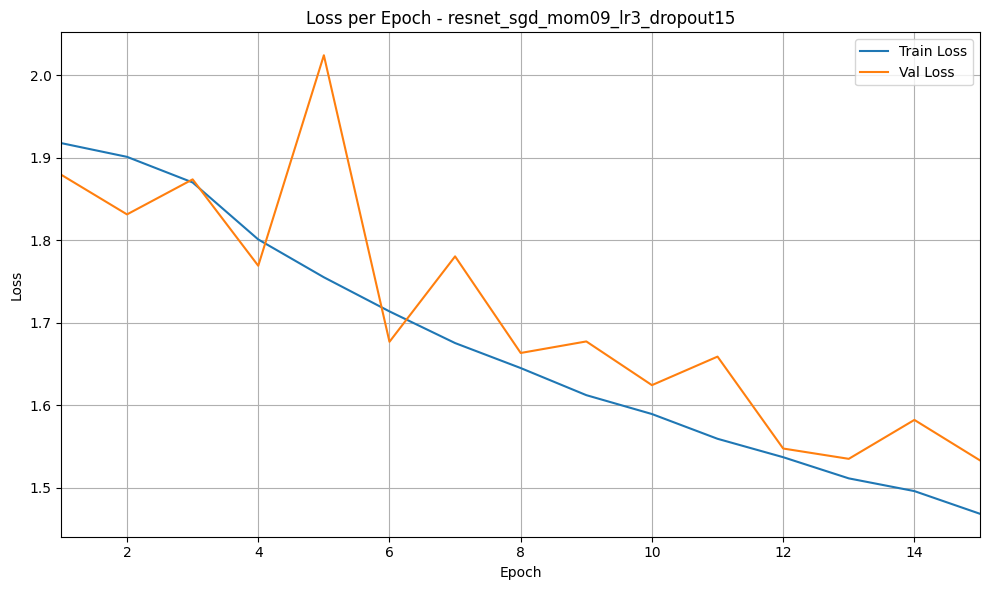

In [6]:
# Train & Val Loss per model
for name, df in model_histories.items():
    plt.figure(figsize=(10, 6))
    plt.plot(df["epoch"], df["train_loss"], label="Train Loss")
    plt.plot(df["epoch"], df["val_loss"], label="Val Loss")
    plt.title(f"Loss per Epoch - {name}")
    plt.xlabel("Epoch")
    plt.ylabel("Loss")
    plt.xlim(1, 15)
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.savefig(f"results/loss_curve_{name}.png")
    plt.show()

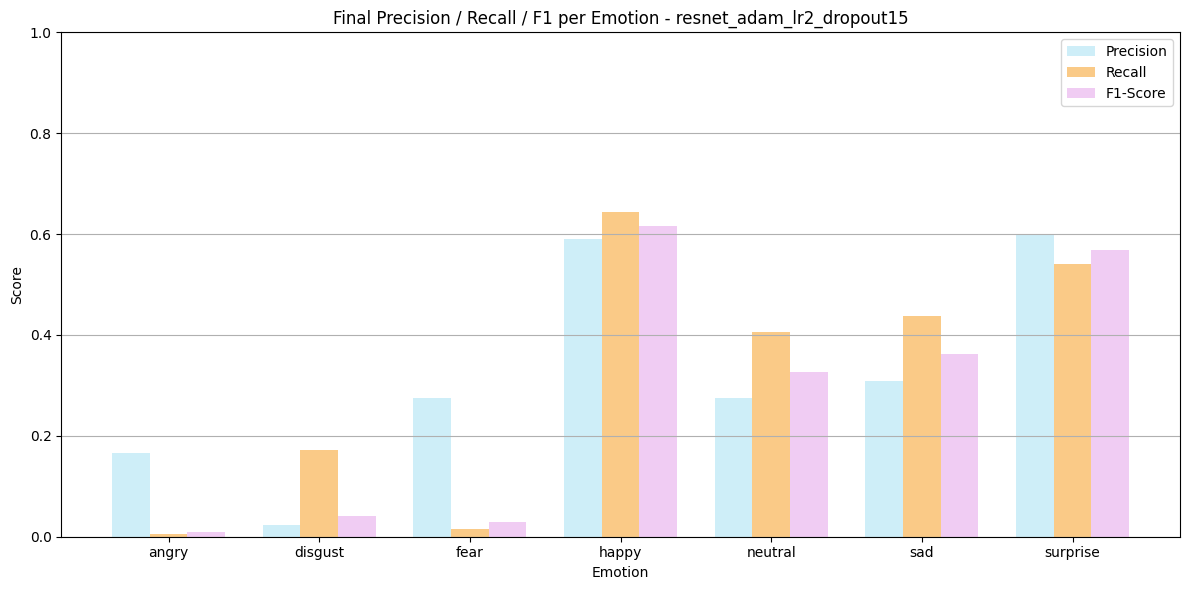

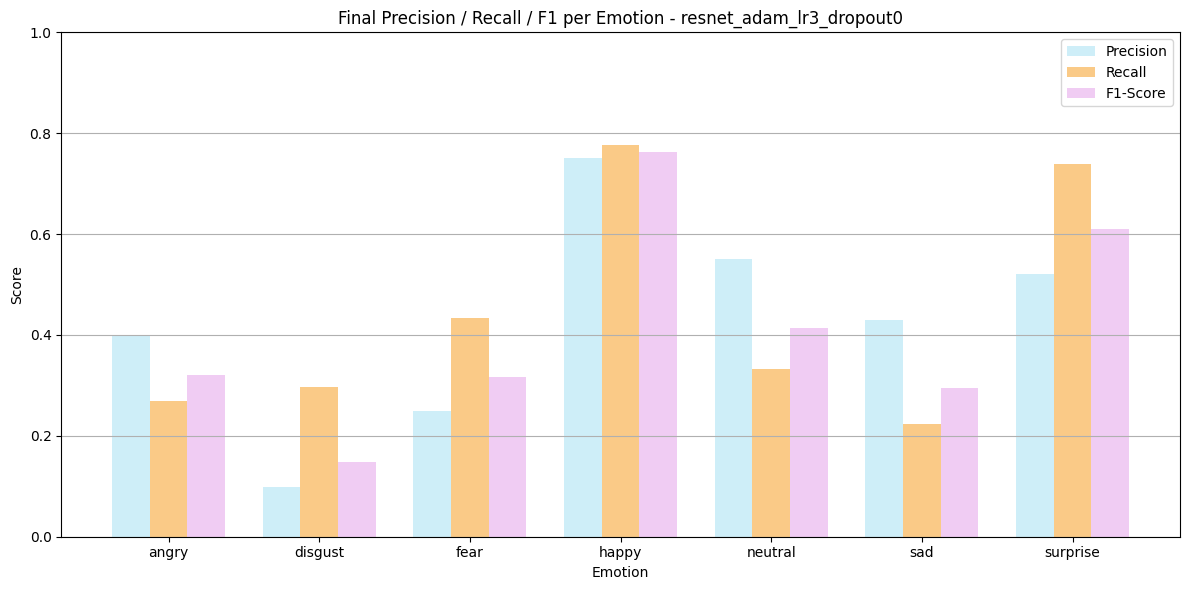

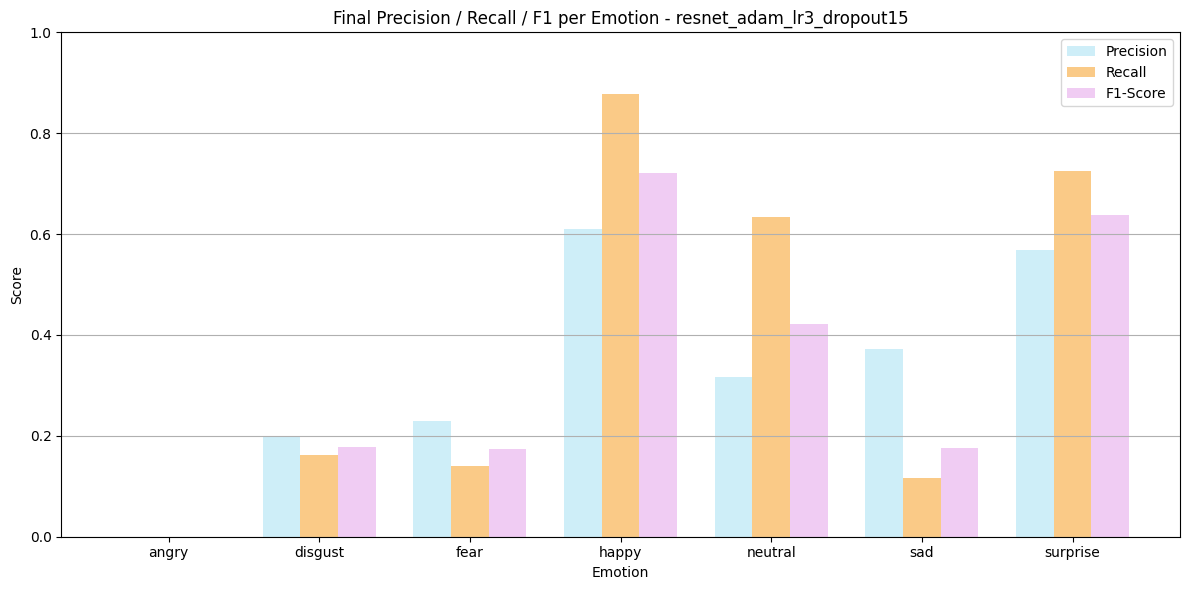

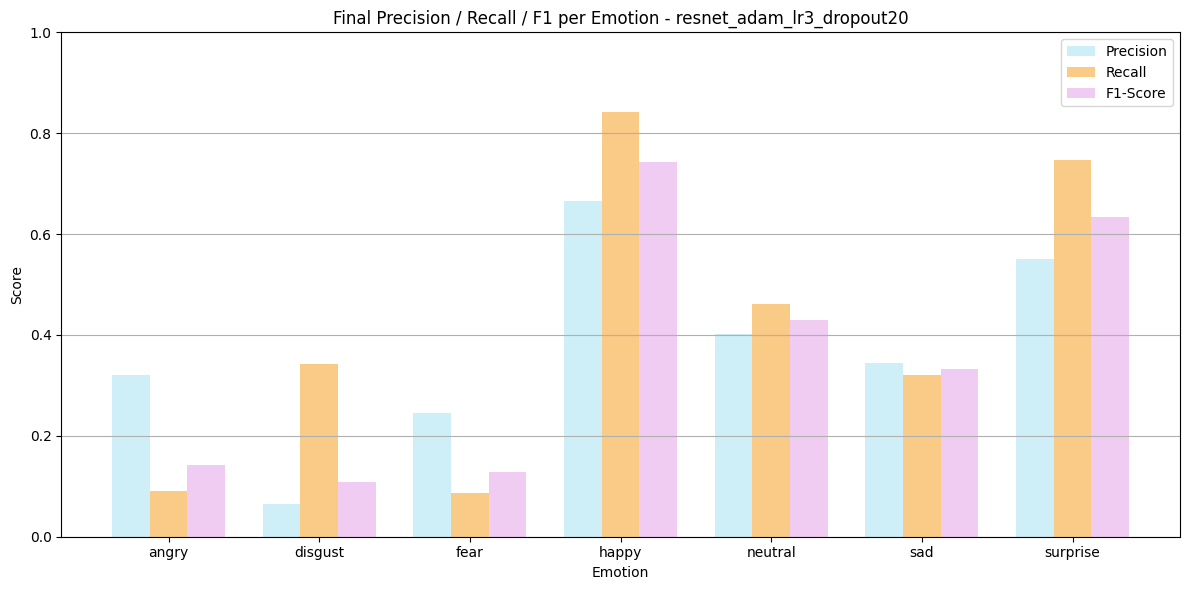

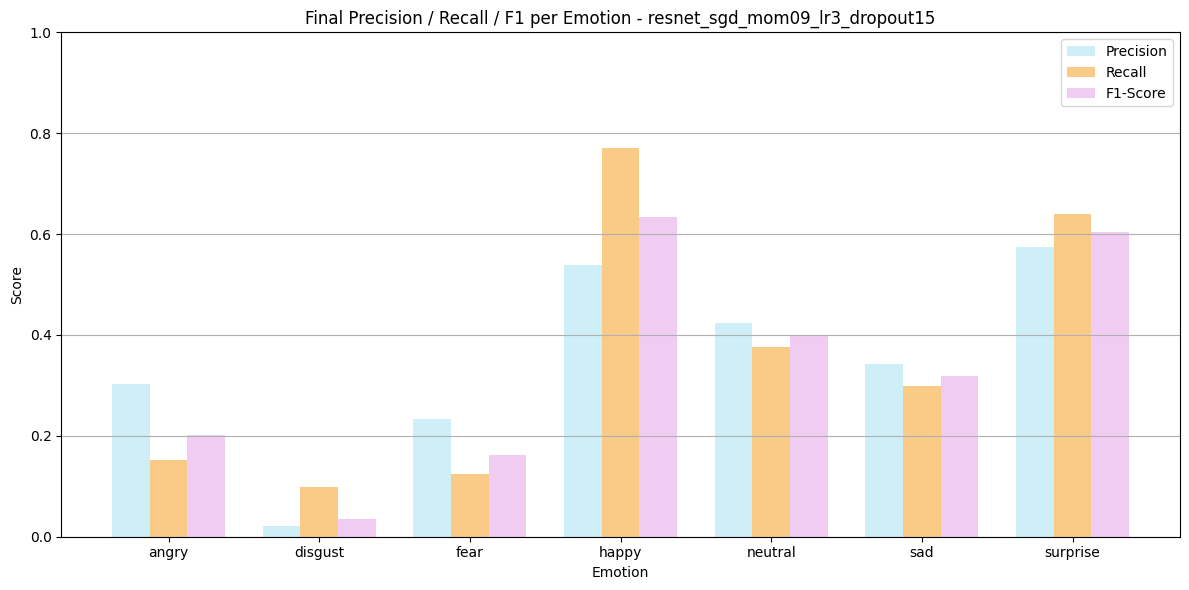

In [7]:
# Final F1 / Precision / Recall per emotion per model
for name, df in model_histories.items():
    last_epoch = df.iloc[-1]
    precisions = [last_epoch[f"{emo}_precision"] for emo in emotion_labels]
    recalls = [last_epoch[f"{emo}_recall"] for emo in emotion_labels]
    f1s = [last_epoch[f"{emo}_f1-score"] for emo in emotion_labels]

    x = range(len(emotion_labels))
    width = 0.25

    # Pastel colors
    pastel_precision = "#ceeef8"  # pastel blue
    pastel_recall = "#FACA87"     # pastel orange
    pastel_f1 = "#F0CCF3"         # pastel purple

    plt.figure(figsize=(12, 6))
    plt.bar([i - width for i in x], precisions, width=width, label="Precision", color=pastel_precision)
    plt.bar(x, recalls, width=width, label="Recall", color=pastel_recall)
    plt.bar([i + width for i in x], f1s, width=width, label="F1-Score", color=pastel_f1)

    plt.xticks(ticks=x, labels=emotion_labels)
    plt.title(f"Final Precision / Recall / F1 per Emotion - {name}")
    plt.xlabel("Emotion")
    plt.ylabel("Score")
    plt.ylim(0, 1)
    plt.legend()
    plt.grid(True, axis='y')
    plt.tight_layout()
    plt.savefig(f"results/emotion_metrics_{name}.png")
    plt.show()

## ResNet Final Model

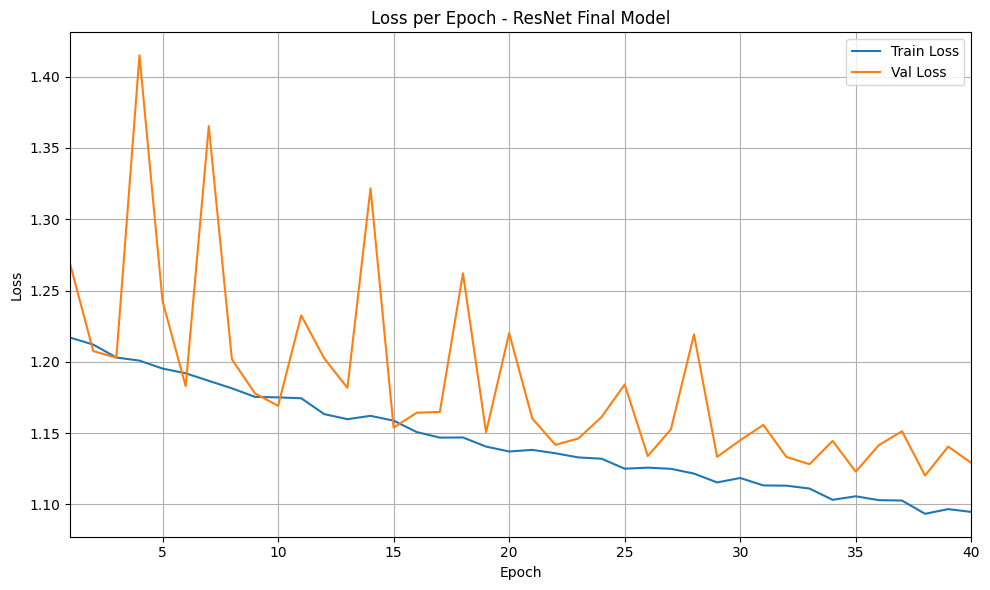

In [8]:
# Load the CSV history file
df = pd.read_csv("results/history_resnet_resnet_final_model.csv")

# Plot train and validation loss
plt.figure(figsize=(10, 6))
plt.plot(df["epoch"], df["train_loss"], label="Train Loss")
plt.plot(df["epoch"], df["val_loss"], label="Val Loss")
plt.title("Loss per Epoch - ResNet Final Model")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.xlim(1, 40)
plt.legend()
plt.grid(True)
plt.tight_layout()

plt.savefig("results/loss_curve_resnet_final_model.png")
plt.show()

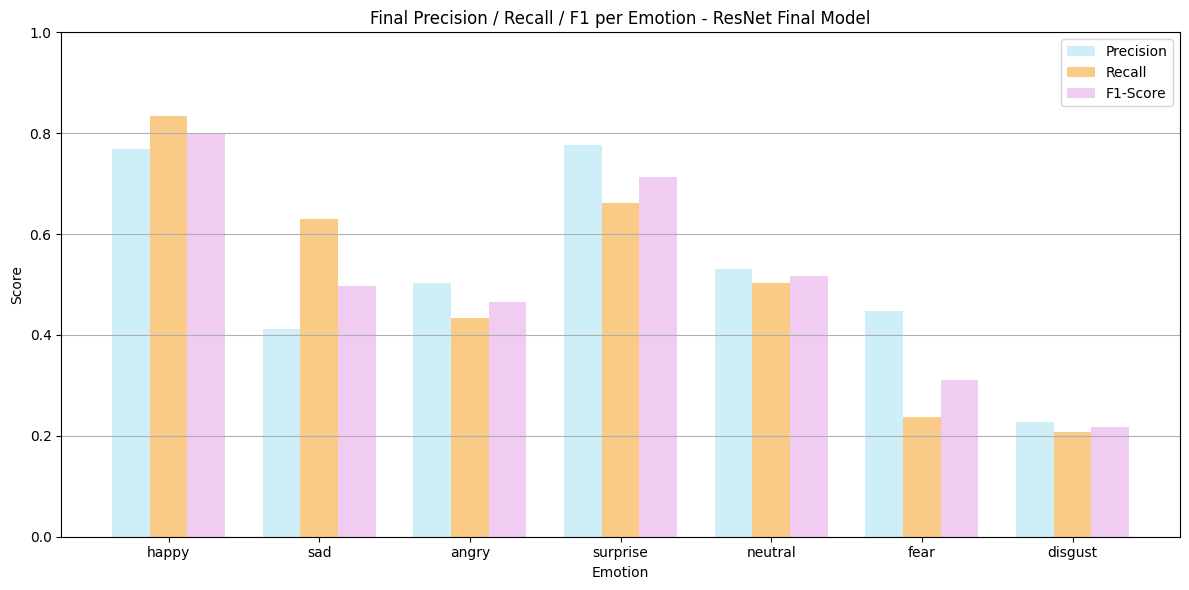

In [9]:
# Define emotion labels
emotion_labels = ['happy', 'sad', 'angry', 'surprise', 'neutral', 'fear', 'disgust']

# Load final model history
df = pd.read_csv("results/history_resnet_resnet_final_model.csv")
last_epoch = df.iloc[-1]

# Extract metrics
precisions = [last_epoch[f"{emo}_precision"] for emo in emotion_labels]
recalls = [last_epoch[f"{emo}_recall"] for emo in emotion_labels]
f1s = [last_epoch[f"{emo}_f1-score"] for emo in emotion_labels]

x = range(len(emotion_labels))
width = 0.25

# Pastel colors
pastel_precision = "#ceeef8"
pastel_recall = "#FACA87"
pastel_f1 = "#F0CCF3"

plt.figure(figsize=(12, 6))
plt.bar([i - width for i in x], precisions, width=width, label="Precision", color=pastel_precision)
plt.bar(x, recalls, width=width, label="Recall", color=pastel_recall)
plt.bar([i + width for i in x], f1s, width=width, label="F1-Score", color=pastel_f1)

plt.xticks(ticks=x, labels=emotion_labels)
plt.title("Final Precision / Recall / F1 per Emotion - ResNet Final Model")
plt.xlabel("Emotion")
plt.ylabel("Score")
plt.ylim(0, 1)
plt.legend()
plt.grid(True, axis='y')
plt.tight_layout()
plt.savefig("results/emotion_metrics_resnet_final_model.png")
plt.show()

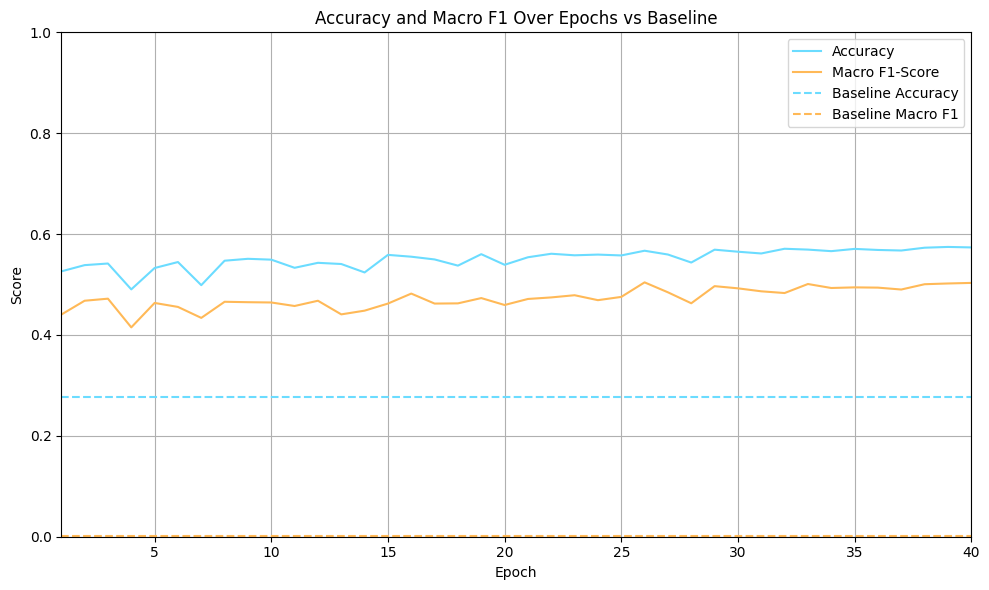

In [10]:
df = pd.read_csv("results/history_resnet_resnet_final_model.csv")

baseline_acc = 0.2777
baseline_macro_f1 = 0.0011

# Plot
plt.figure(figsize=(10, 6))
plt.plot(df["epoch"], df["val_acc"], label="Accuracy", color="#6bdcff")
plt.plot(df["epoch"], df["val_f1_macro"], label="Macro F1-Score", color="#FFB957")

# Baseline lines
plt.axhline(y=baseline_acc, color="#6bdcff", linestyle="--", label="Baseline Accuracy")
plt.axhline(y=baseline_macro_f1, color="#FFB957", linestyle="--", label="Baseline Macro F1")

plt.xlabel("Epoch")
plt.ylabel("Score")
plt.title("Accuracy and Macro F1 Over Epochs vs Baseline")
plt.ylim(0, 1)
plt.xlim(1, 40)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.savefig("results/acc_f1_vs_baseline.png")
plt.show()

## Clustering of emotions

In [11]:
import torch
import torch.nn as nn
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
from torchvision import datasets, transforms
from torch.utils.data import DataLoader
import numpy as np
import os
import torch.nn.functional as F

from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
import os

In [12]:
# Define transformation for test set
transform = transforms.Compose([
    transforms.Resize((48, 48)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.5]*3, std=[0.5]*3)
])
test_dataset = datasets.ImageFolder('./data/test', transform=transform)
test_loader = DataLoader(test_dataset, batch_size=64, shuffle=False)

# Define model (same architecture as in training)
class ResSim(nn.Module):
    def __init__(self, num_classes=7, dropout_rate=0.15):
        super(ResSim, self).__init__()
        self.dropout = nn.Dropout(dropout_rate)

        # Block 1
        self.block1 = nn.Sequential(
            nn.Conv2d(3, 24, kernel_size=3, padding=1),
            nn.BatchNorm2d(24),
            nn.ReLU(),
            nn.Conv2d(24, 24, kernel_size=3, padding=1),
            nn.BatchNorm2d(24)
        )
        self.shortcut1 = nn.Conv2d(3, 24, kernel_size=1)

        # Block 2
        self.block2 = nn.Sequential(
            nn.Conv2d(24, 48, kernel_size=3, padding=1),
            nn.BatchNorm2d(48),
            nn.ReLU(),
            nn.Conv2d(48, 48, kernel_size=3, padding=1),
            nn.BatchNorm2d(48)
        )
        self.shortcut2 = nn.Conv2d(24, 48, kernel_size=1)

        self.pool = nn.MaxPool2d(2, 2)

        # Final FC layer stays at 64
        self.fc = nn.Sequential(
            nn.Linear(12 * 12 * 48, 64),
            nn.ReLU(),
            nn.Dropout(dropout_rate),
            nn.Linear(64, num_classes)
        )

    def forward(self, x):
        x1 = self.block1(x)
        x = self.pool(F.relu(x1 + self.shortcut1(x)))
        x = self.dropout(x)

        x2 = self.block2(x)
        x = self.pool(F.relu(x2 + self.shortcut2(x)))
        x = self.dropout(x)

        x = x.view(x.size(0), -1)
        return self.fc(x)

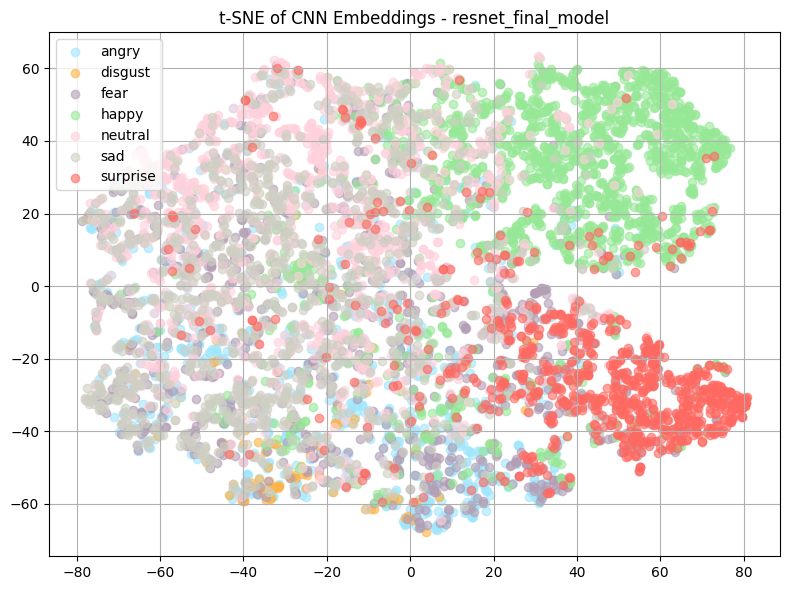

In [13]:
# Load model and extract features
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = ResSim().to(device)
model.load_state_dict(torch.load("results/resnet_final_model.pth"))
model.eval()

all_features = []
all_labels = []

with torch.no_grad():
    for images, labels in test_loader:
        images = images.to(device)
        features = model(images)
        all_features.append(features.cpu())
        all_labels.append(labels)

all_features = torch.cat(all_features).numpy()
all_labels = torch.cat(all_labels).numpy()

# Run t-SNE
tsne = TSNE(n_components=2, perplexity=30, random_state=42)
tsne_results = tsne.fit_transform(all_features)

# Plot
plt.figure(figsize=(8, 6))
emotion_labels = test_dataset.classes
colors = ['#a0e6fc', '#FFB347', '#B39EB5', "#96E896", '#FFD1DC', '#CFCFC4', '#FF6961']
for idx, label in enumerate(np.unique(all_labels)):
    mask = all_labels == label
    plt.scatter(tsne_results[mask, 0], tsne_results[mask, 1], label=emotion_labels[label], alpha=0.6, color=colors[idx])

plt.title("t-SNE of CNN Embeddings - resnet_final_model")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.savefig("results/tsne_resnet_final_model.png")
plt.show()

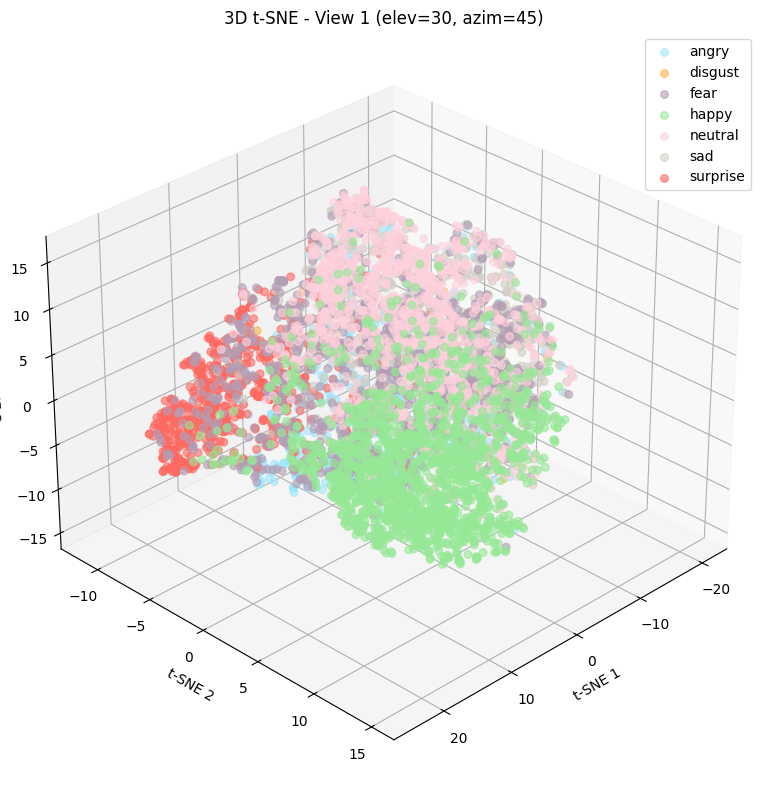

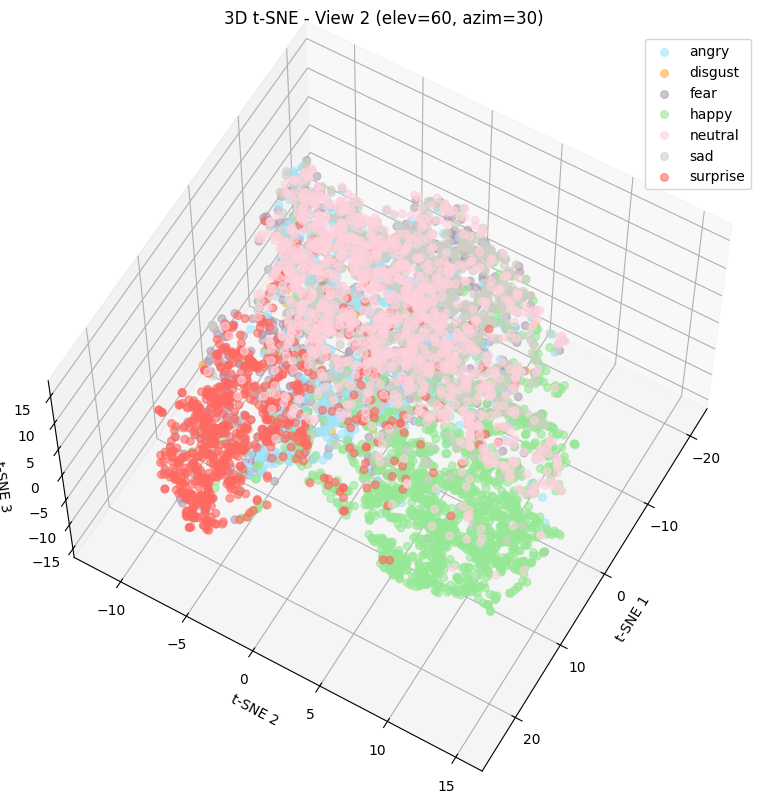

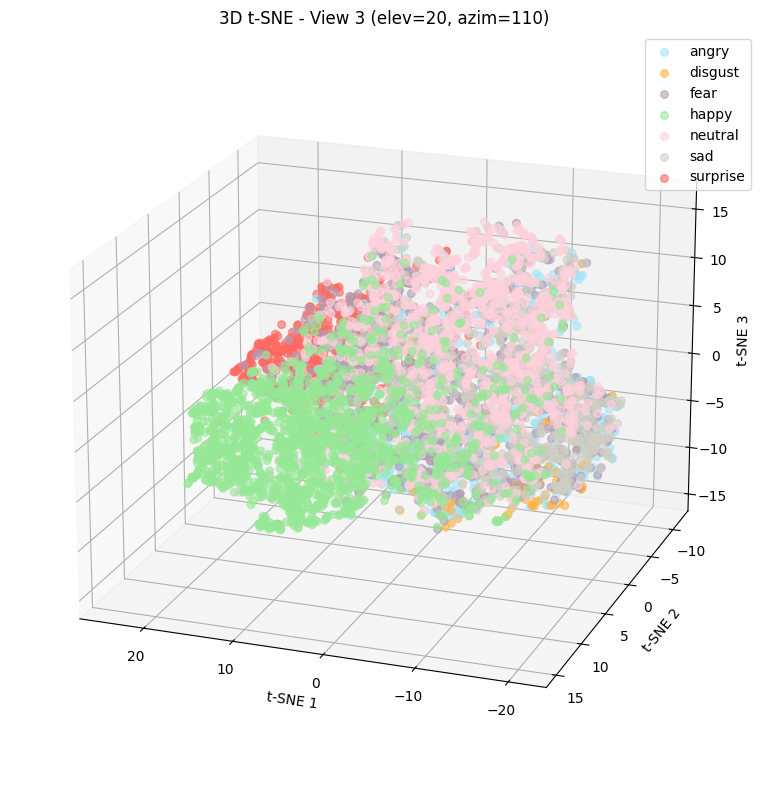

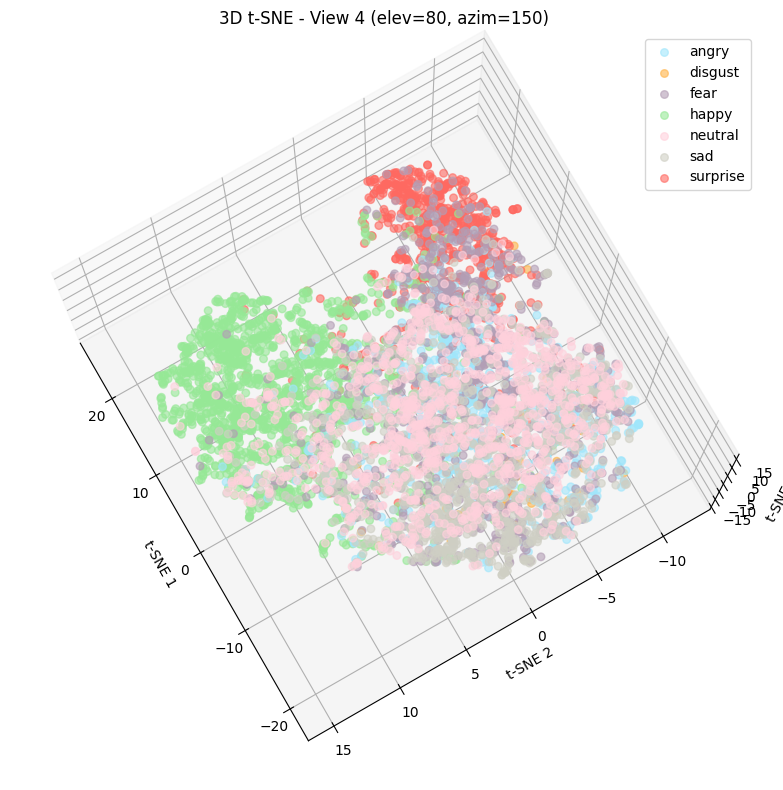

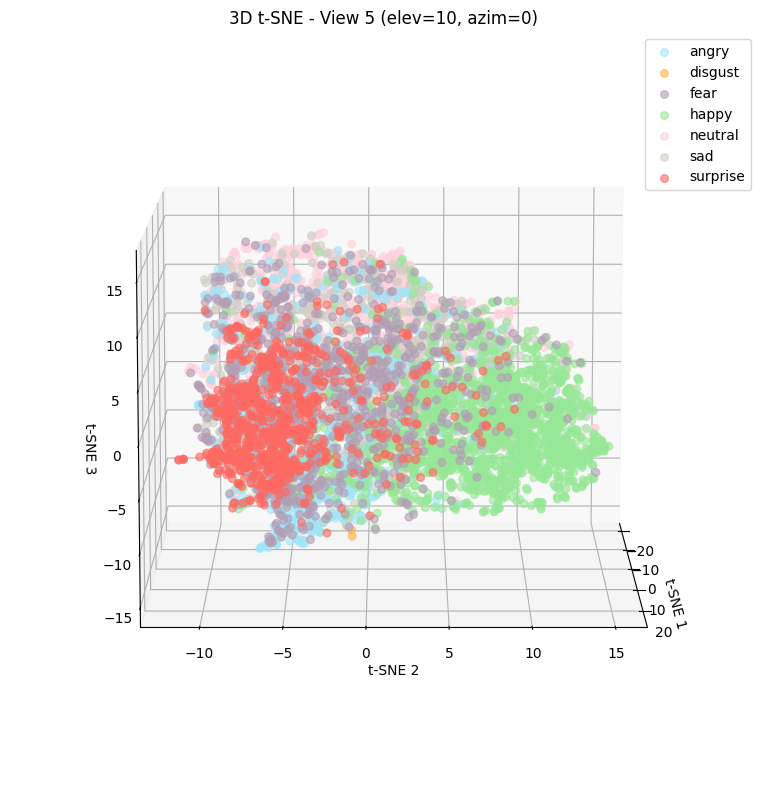

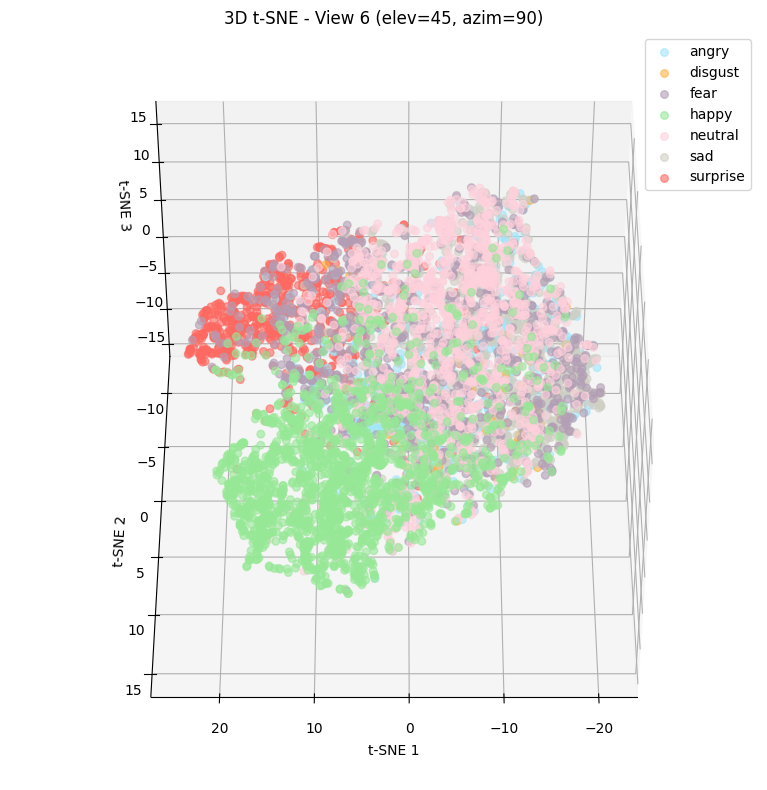

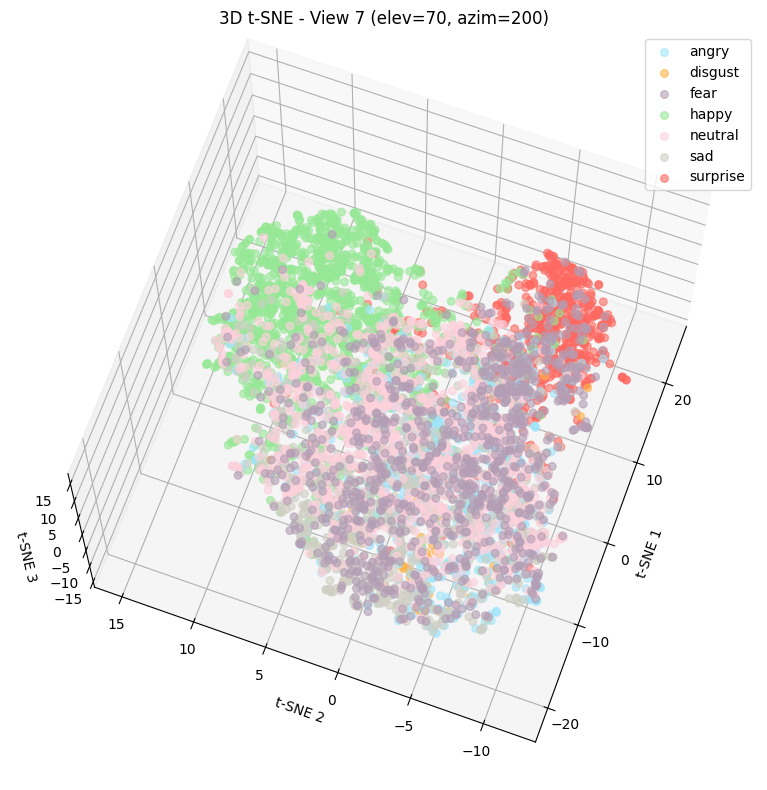

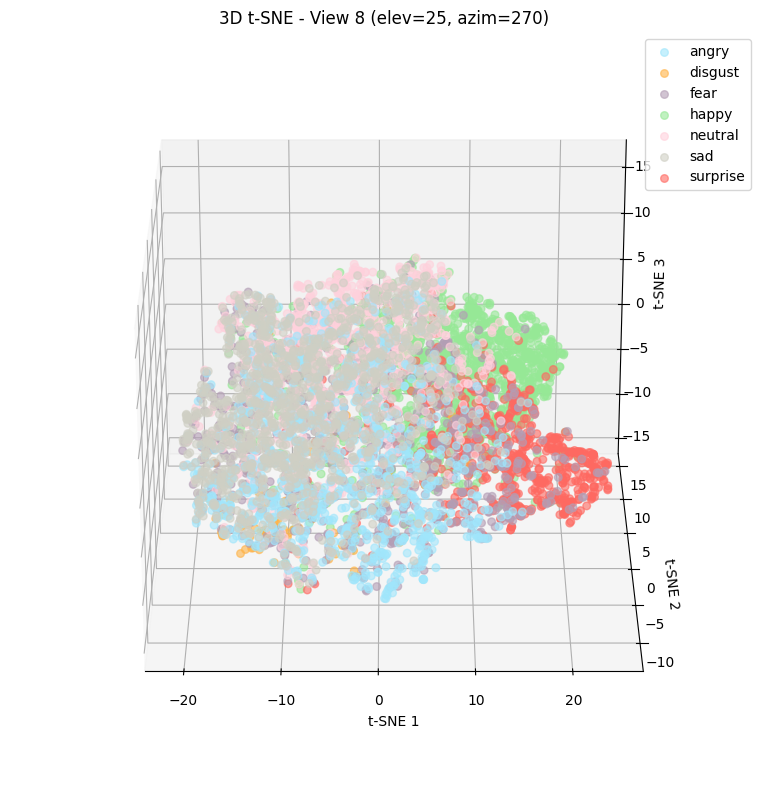

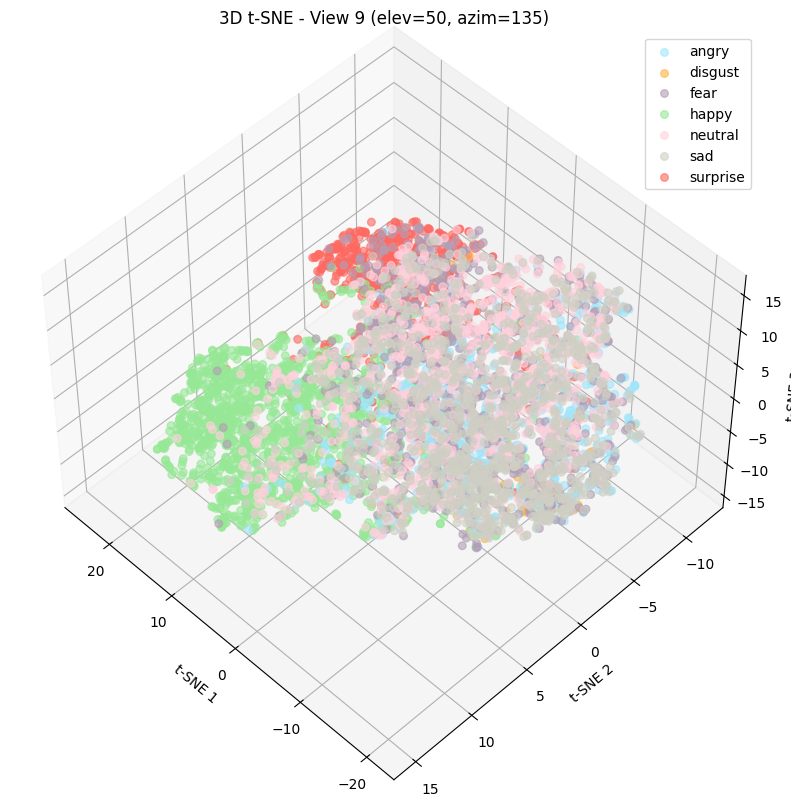

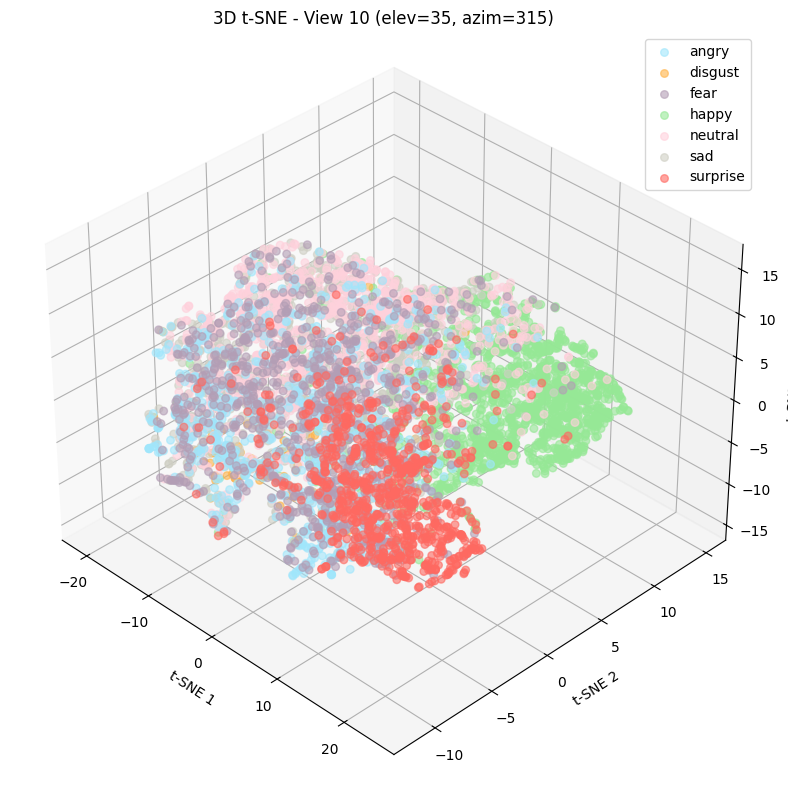

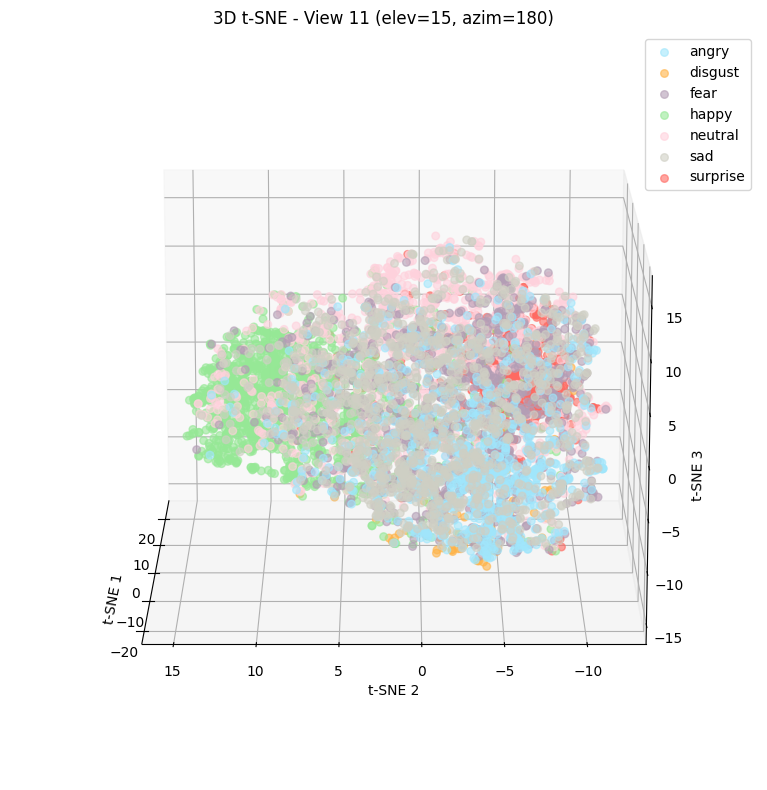

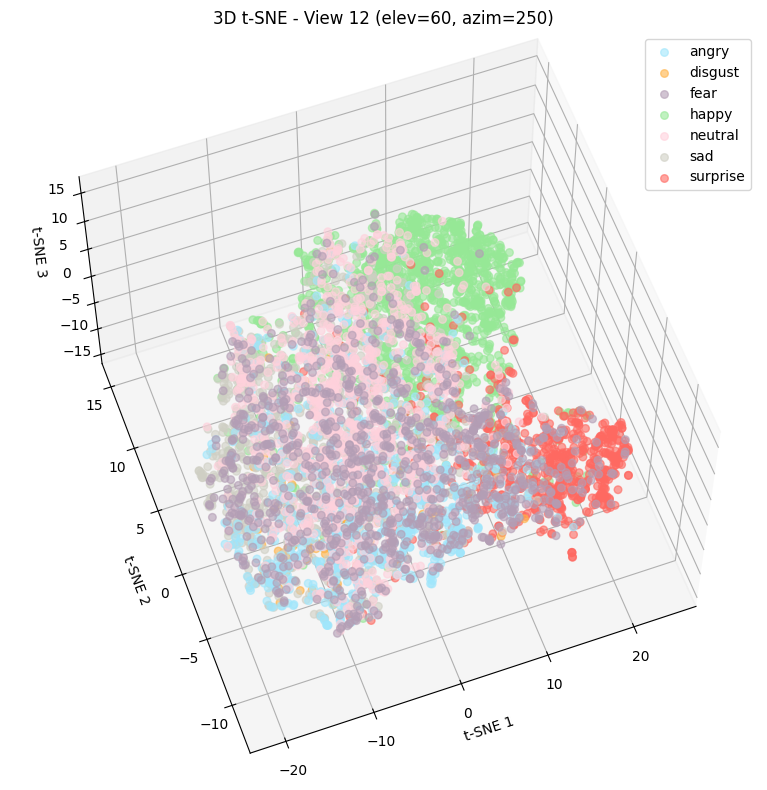

In [14]:
# Run t-SNE with 3 components
tsne = TSNE(n_components=3, perplexity=30, random_state=42)
tsne_results = tsne.fit_transform(all_features)

# Settings
emotion_labels = test_dataset.classes
colors = ['#a0e6fc', '#FFB347', '#B39EB5', "#96E896", '#FFD1DC', '#CFCFC4', '#FF6961']
view_angles = [
    (30, 45), (60, 30), (20, 110), (80, 150),
    (10, 0), (45, 90), (70, 200), (25, 270),
    (50, 135), (35, 315), (15, 180), (60, 250)
]

# Plot from multiple angles
for i, (elev, azim) in enumerate(view_angles):
    fig = plt.figure(figsize=(10, 8))
    ax = fig.add_subplot(111, projection='3d')

    for idx, label in enumerate(np.unique(all_labels)):
        mask = all_labels == label
        ax.scatter(tsne_results[mask, 0], tsne_results[mask, 1], tsne_results[mask, 2],
                   label=emotion_labels[label], alpha=0.6, color=colors[idx], s=30)

    ax.view_init(elev=elev, azim=azim)
    ax.set_title(f"3D t-SNE - View {i+1} (elev={elev}, azim={azim})")
    ax.set_xlabel("t-SNE 1")
    ax.set_ylabel("t-SNE 2")
    ax.set_zlabel("t-SNE 3")
    ax.legend()
    plt.tight_layout()
    plt.savefig(f"results/tsne3d_resnet_view{i+1}.png")
    plt.show()